In [18]:
import os
import sys
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD as LSA
from ibopf.settings import settings
from ibopf.avocado_adapter import Dataset, MMMBOPFFeaturizer, AVOCADOFeaturizer
from ibopf import IBOPF, CompactIBOPF
import pacmap
import time
# we move to the main directory so the default settings load, you can always load new settings through a user_settings.json dictionary
# %cd .. 
%cd D:/tesis

D:\tesis


# Space visualization
we use:
- UMAP
- PACMAP
- LSA

In [3]:
def load_features(dataset_name, method="IBOPF", tag="features_v3_LSA", sparse=False):
    # Load the dataset (metadata only)
    print("Loading dataset '%s'..." % dataset_name)
    dataset = Dataset.load(dataset_name, metadata_only=True)
    dataset.set_method(method)
    
    # Load the dataset features depending on method
    print("Loading features...")
    if method == "IBOPF":
        if sparse:
            dataset.load_sparse_features(tag)
        else:
            dataset.load_compact_features(tag)
        featurizer = MMMBOPFFeaturizer(include_metadata=True)
    else:
        dataset.load_raw_features()
        featurizer = AVOCADOFeaturizer()
        
    df_features = dataset.select_features(featurizer)
        
        
        
    return df_features, dataset.metadata["class"]

In [4]:
avocado_fea, avocado_labels = load_features("plasticc_augment_v3", method="AVOCADO")
print(avocado_fea.shape)
avocado_fea.head()

Loading dataset 'plasticc_augment_v3'...
Loading features...
(80856, 41)


,host_photoz,host_photoz_error,length_scale,max_mag,pos_flux_ratio,max_flux_ratio_red,max_flux_ratio_blue,min_flux_ratio_red,min_flux_ratio_blue,max_dt,...,count_max_rise_100,count_max_fall_20,count_max_fall_50,count_max_fall_100,peak_frac_2,total_s2n,percentile_diff_10_50,percentile_diff_30_50,percentile_diff_70_50,percentile_diff_90_50
object_id,,,,,,,,,,,,,,,,,,,,,
plasticc_000000615,0.0,0.0,0.810587,-7.065665,0.617706,0.408176,0.625225,0.467499,0.618597,-1.0,...,58,27,55,65,0.937435,1680.334319,-0.331157,-0.241635,0.281992,0.526983
plasticc_000000615_aug_AbjDyHvcjX,0.0,0.0,1.986950,-6.432996,0.611081,0.462652,0.614419,0.442930,0.636407,-73.0,...,38,14,20,20,0.986236,559.431198,-0.282959,-0.201267,0.220213,0.488328
plasticc_000000615_aug_AsmspjWzJm,0.0,0.0,1.679606,-6.655993,0.667554,0.439925,0.559108,0.414655,0.586028,-52.0,...,46,19,23,23,0.929346,553.432737,-0.177502,-0.146433,0.235733,0.460614
plasticc_000000615_aug_BKCzLjGtRi,0.0,0.0,3.306436,-6.497136,0.661442,0.389915,0.522879,0.529953,0.631806,-723.0,...,43,11,19,19,0.946962,486.709651,-0.219526,-0.128570,0.266285,0.427889
plasticc_000000615_aug_BTzTrkiBQL,0.0,0.0,2.403185,-7.079541,0.680899,0.401509,0.600447,0.504744,0.667935,-342.0,...,28,17,26,33,0.950321,580.062596,-0.224600,-0.106573,0.231669,0.567769


In [5]:
ibopf_fea_sparse, ibopf_labels = load_features("plasticc_augment_v3", method="IBOPF", tag="features_v3_LSA", sparse=True)
print(ibopf_fea_sparse.shape)
ibopf_fea_sparse.head()

Loading dataset 'plasticc_augment_v3'...
Loading features...
raw sparse features shape: (80856, 816)
(80856, 818)


,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea809,fea810,fea811,fea812,fea813,fea814,fea815,fea816,host_photoz,host_photoz_error
object_id,,,,,,,,,,,,,,,,,,,,,
plasticc_000000615,0.0,0.0,2.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
plasticc_000000615_aug_AbjDyHvcjX,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
plasticc_000000615_aug_AsmspjWzJm,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
plasticc_000000615_aug_BKCzLjGtRi,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
plasticc_000000615_aug_BTzTrkiBQL,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ibopf_fea_compact, ibopf_labels_compact = load_features("plasticc_augment_v3", method="IBOPF", tag="features_v3_LSA", sparse=False)
print(ibopf_fea_compact.shape)
ibopf_fea_compact.head()

Loading dataset 'plasticc_augment_v3'...
Loading features...
raw compact features shape: (80856, 361)
(80856, 363)


,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea354,fea355,fea356,fea357,fea358,fea359,fea360,fea361,host_photoz,host_photoz_error
object_id,,,,,,,,,,,,,,,,,,,,,
plasticc_000000615,0.518071,0.427548,-0.263188,0.293871,-0.132929,0.030204,0.044281,0.071112,-0.094896,-0.093709,...,0.011064,0.008378,-0.017447,-0.015078,0.016279,-0.007820,-0.009198,0.015981,0.0,0.0
plasticc_000000615_aug_AbjDyHvcjX,0.495914,0.447930,-0.259099,0.223225,0.004493,-0.009399,0.120437,0.030973,-0.062315,-0.101891,...,0.002941,0.012499,-0.037316,0.005278,-0.003837,-0.004988,0.005561,0.000381,0.0,0.0
plasticc_000000615_aug_AsmspjWzJm,0.561952,0.327501,-0.348189,0.234282,-0.201789,-0.018615,-0.008638,-0.015593,-0.045985,-0.056730,...,0.018275,0.001461,-0.001295,-0.005594,0.009484,-0.019114,0.001063,-0.004862,0.0,0.0
plasticc_000000615_aug_BKCzLjGtRi,0.583614,0.352556,-0.240495,0.167820,0.021985,0.001247,-0.022133,0.015532,-0.243475,-0.006601,...,-0.002931,0.014068,0.026559,0.003132,0.001329,-0.007439,-0.003976,-0.002026,0.0,0.0
plasticc_000000615_aug_BTzTrkiBQL,0.493466,0.413772,-0.261762,0.221495,-0.048455,-0.059570,-0.009826,0.057383,-0.165776,-0.001519,...,0.007696,-0.001362,0.011880,-0.011985,-0.005974,0.012815,0.002378,0.009326,0.0,0.0


In [7]:
plot_labels_extra_short = {
    6: 'Single microlens',
    15: 'TDE',
    16: 'Eclip. Binary',
    42: 'SNII',
    52: 'SNIax',
    53: 'Mira',
    62: 'SNIbc',
    64: 'Kilonova',
    65: 'M-dwarf',
    67: 'SNIa-91bg',
    88: 'AGN',
    90: 'SNIa',
    92: 'RR lyrae',
    95: 'SLSN-I',
    99: 'Unknown',
} 

def prepare_labels(labels):
    labels_verbose =  [plot_labels_extra_short[x] for x in labels]
    print(np.unique(labels_verbose))
    le = LabelEncoder()
    le.fit(np.unique(labels_verbose))
    y = le.transform(labels_verbose)
    return y, le

def visualization2D(df, y, le, reducer="UMAP", ax=None, hide_labels=False):
    if ax is None:
        fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
    cax = ax.scatter(df[:, 0], df[:, 1], c=y, marker='.', s=1)
    if not hide_labels:
        ax.set_xlabel("%s 1" % reducer, fontsize=15)
        ax.set_ylabel("%s 2" % reducer, fontsize=15)
    # ax.legend();
    # cbar = plt.colorbar(cax, orientation='horizontal')
    # cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                       # labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
    # cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
    # plt.show()
    return cax
    
def visualization3D(df, y, le, reducer="UMAP", ax=None, hide_labels=False):
    if ax is None:
        fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
    ax = plt.axes(projection='3d')
    cax = ax.scatter(df[:, 0], df[:, 1], df[:, 2],  c=y, marker='.')
    if not hide_labels:
        ax.set_xlabel("%s 1" % reducer)
        ax.set_ylabel("%s 2" % reducer)
        ax.set_zlabel("%s 3" % reducer)
    # ax.legend();
    # cbar = plt.colorbar(cax, orientation='horizontal')
    # cbar.ax.set_xticks(np.array(range(y.max()+1)), 
    #                    labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
    # cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90)
    # plt.show()
    return cax

    


In [15]:
def visualize_all(fea_methods, titles, labels, reducer, reducer_name, out_file):
    scaler = StandardScaler()
    dfs_reduced = []
    for df, title in zip(fea_methods, titles):
        print("processing ", title)
        ini = time.time()
        if any(df.isna().any()):
            df = df.drop(columns=df.columns[df.isna().any()].tolist())
        
        scaler.fit(df)
        df_scaled = scaler.transform(df)
        
        df_reduced = reducer.fit_transform(df_scaled)
        dfs_reduced.append(df_reduced)
        print("-> DONE (TIME: %.3f)" % (time.time() - ini))
        
    # plot
    print("PLOTING...")
    fig, ax = plt.subplots(1, len(dfs_reduced), figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0, hspace=0)
    y, le = prepare_labels(labels)
    hide_labels = False
    for i, df in enumerate(dfs_reduced):
        cax = visualization2D(df, y, le, reducer=reducer_name, ax=ax[i], hide_labels=hide_labels)
        if not hide_labels:
            hide_labels = True
        if i > 0:
            ax[i].set_xlabel("%s 1" % reducer_name, fontsize=15)
        else:
            ax[i].tick_params(axis="y", labelsize=14)

        ax[i].set_title(titles[i], fontsize=15)
        ax[i].tick_params(axis="x", labelsize=14)

    fig.suptitle("%s 2D visualization" % reducer_name, fontsize=15)

    cbar = plt.colorbar(cax, shrink=0.6, ax=ax.ravel().tolist(), orientation='horizontal')
    cbar.ax.set_xticks(np.array(range(y.max()+1)), 
                           labels=[le.inverse_transform([i])[0] for i in (np.array(range(y.max()+1)))])
    cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=90, fontsize=14)
    plt.savefig(out_file)
    

## VISUALIZE UMAP 2D

processing  IBOPF Sparse
-> DONE (TIME: 43.240)
processing  AVOCADO
-> DONE (TIME: 35.846)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


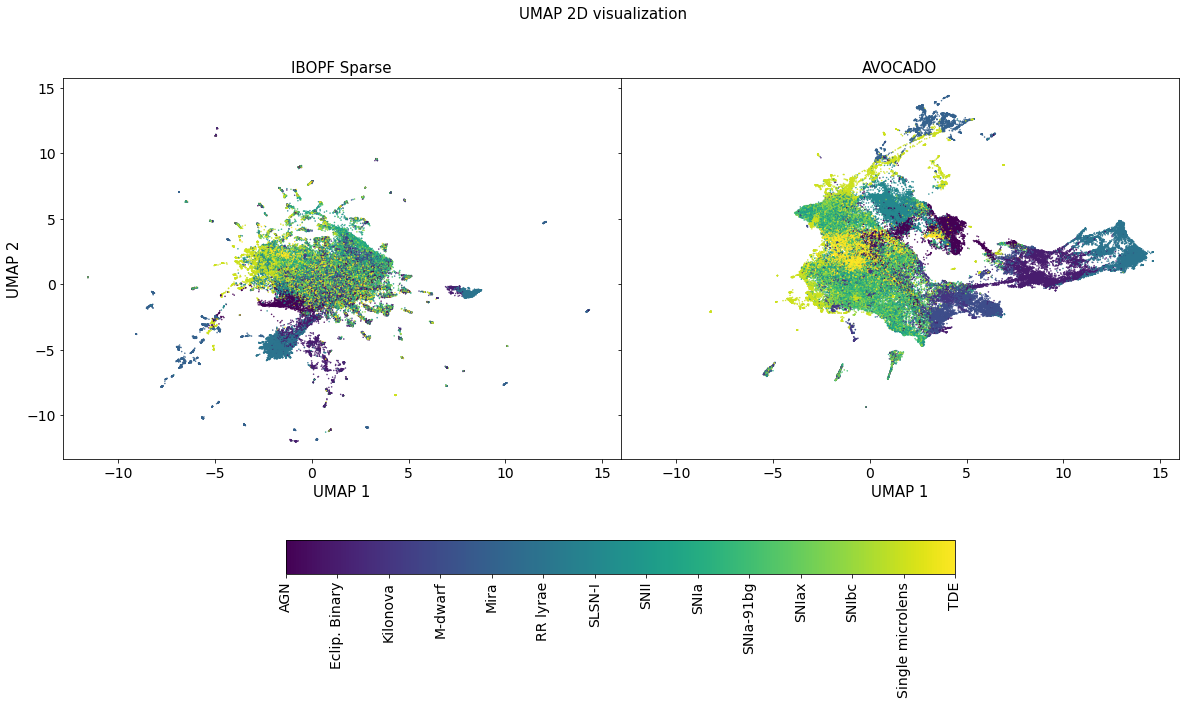

In [29]:
reducer = umap.UMAP()
visualize_all([ibopf_fea_sparse, avocado_fea], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "UMAP", "notebooks/new_figures/umap2d.png")

processing  IBOPF Sparse
-> DONE (TIME: 40.876)
processing  AVOCADO
-> DONE (TIME: 32.815)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


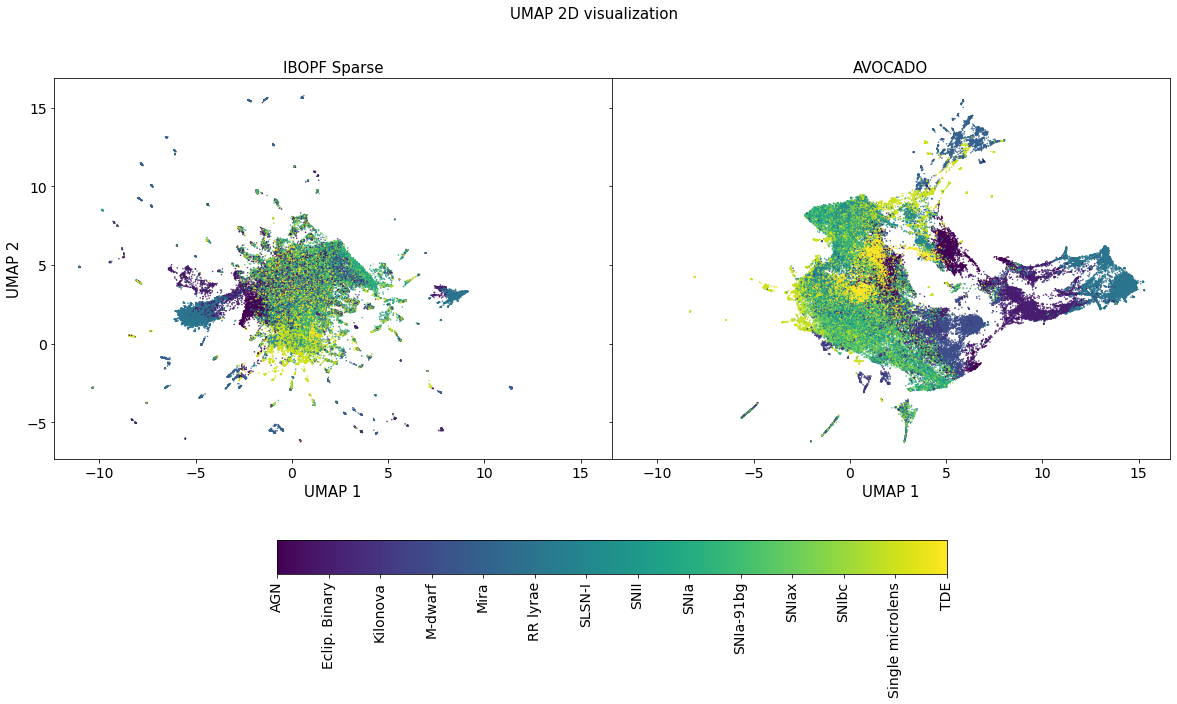

In [28]:
reducer = umap.UMAP()
visualize_all([ibopf_fea_sparse.drop(columns=["host_photoz_error", "host_photoz"]), 
               # ibopf_fea_compact.drop(columns=["host_photoz_error", "host_photoz"]), 
               avocado_fea.drop(columns=["host_photoz_error", "host_photoz"])], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "UMAP", "notebooks/new_figures/umap_onlyfea_2d.png")

## Visualize PACMAP 2D

processing  IBOPF Sparse
-> DONE (TIME: 134.995)
processing  AVOCADO
-> DONE (TIME: 98.096)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


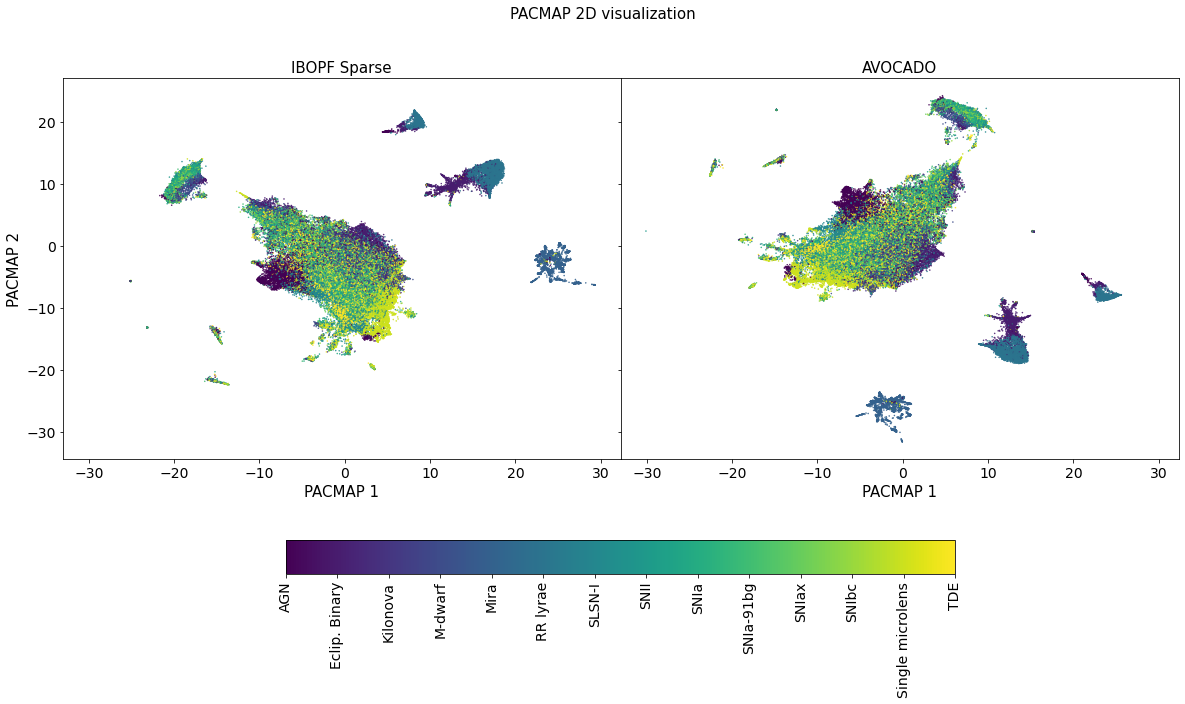

In [27]:
reducer = pacmap.PaCMAP(n_dims=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=4.0)
visualize_all([ibopf_fea_sparse, avocado_fea], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "PACMAP", "notebooks/new_figures/pacmap2d.png")

processing  IBOPF Sparse
-> DONE (TIME: 133.281)
processing  AVOCADO
-> DONE (TIME: 99.588)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


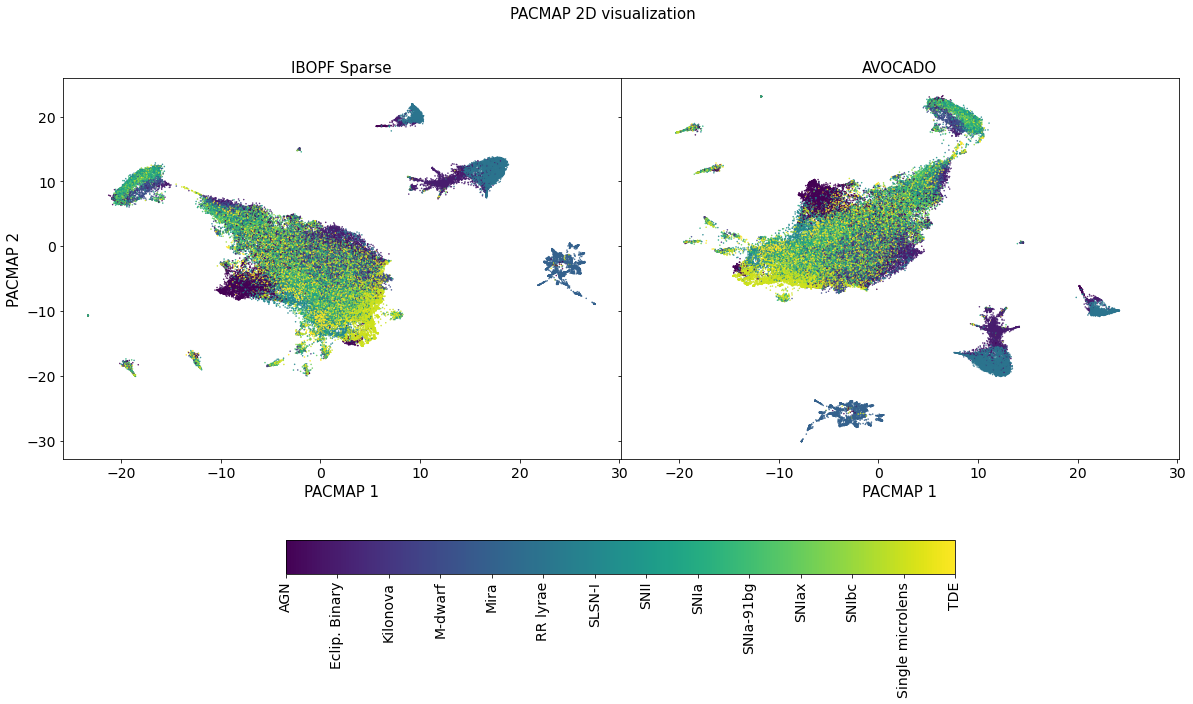

In [26]:
reducer = pacmap.PaCMAP(n_dims=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=4.0)
visualize_all([ibopf_fea_sparse.drop(columns=["host_photoz_error", "host_photoz"]), 
               # ibopf_fea_compact.drop(columns=["host_photoz_error", "host_photoz"]), 
               avocado_fea.drop(columns=["host_photoz_error", "host_photoz"])], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "PACMAP", "notebooks/new_figures/pacmap_onlyfea_2d.png")

## Visualize LSA 2D

processing  IBOPF Sparse
-> DONE (TIME: 2.637)
processing  AVOCADO
-> DONE (TIME: 0.249)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


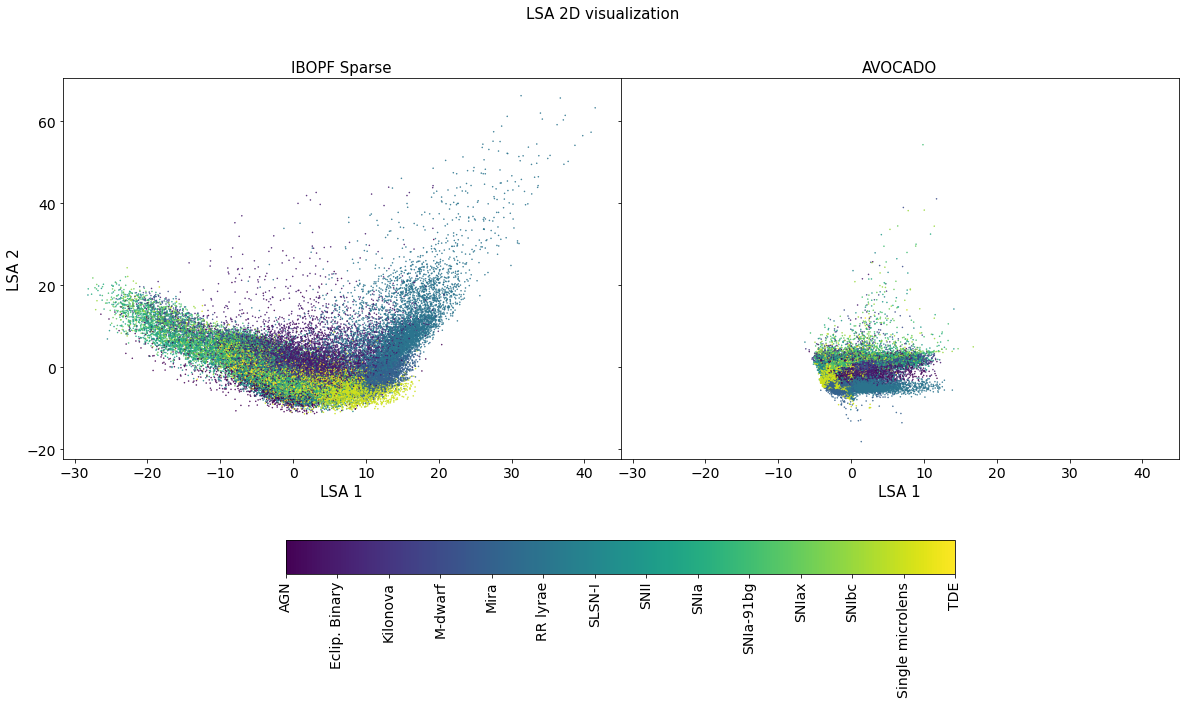

In [25]:
# this is just for completitud on the computing times
reducer = LSA()
visualize_all([ibopf_fea_sparse, avocado_fea], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "LSA", "notebooks/new_figures/lsa2d.png")

processing  IBOPF Sparse
-> DONE (TIME: 2.623)
processing  AVOCADO
-> DONE (TIME: 0.271)
PLOTING...
['AGN' 'Eclip. Binary' 'Kilonova' 'M-dwarf' 'Mira' 'RR lyrae' 'SLSN-I'
 'SNII' 'SNIa' 'SNIa-91bg' 'SNIax' 'SNIbc' 'Single microlens' 'TDE']


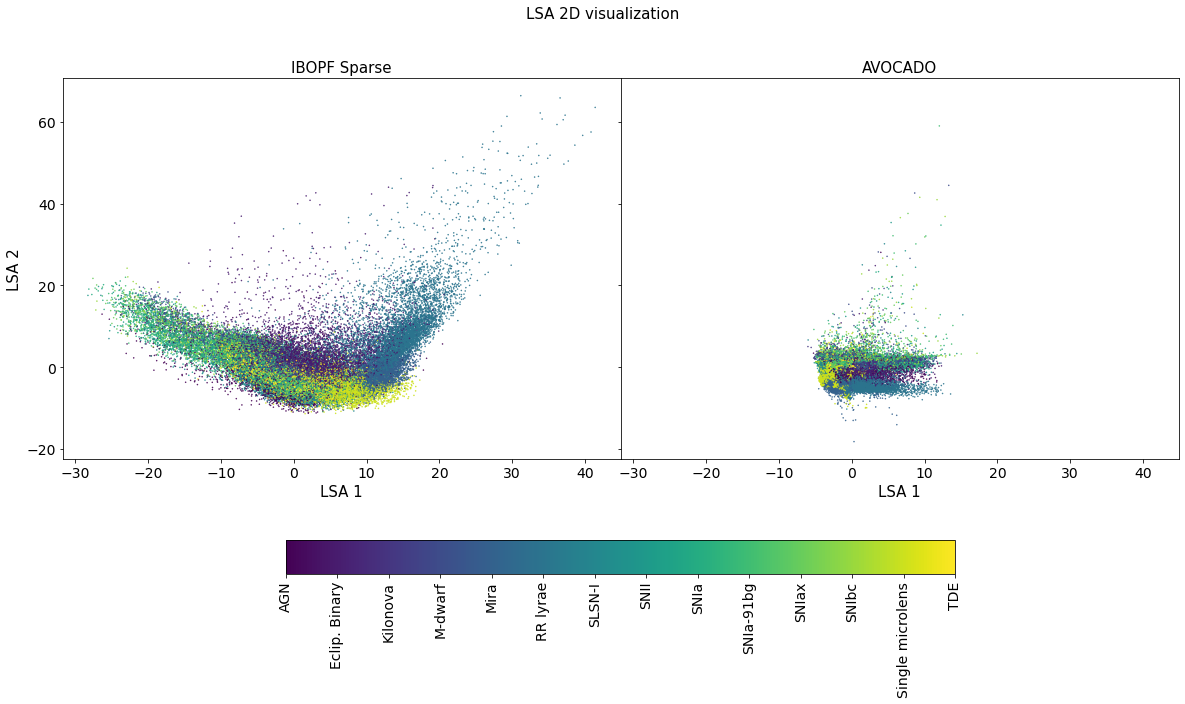

In [24]:
# this is just for completitud on the computing times
reducer = LSA()
visualize_all([ibopf_fea_sparse.drop(columns=["host_photoz_error", "host_photoz"]), 
               # ibopf_fea_compact.drop(columns=["host_photoz_error", "host_photoz"]), 
               avocado_fea.drop(columns=["host_photoz_error", "host_photoz"])], 
              ["IBOPF Sparse", "AVOCADO"], 
              avocado_labels, reducer, "LSA", "notebooks/new_figures/lsa_onlyfea_2d.png")

# Metrics evaluation
- adjusted mutual-information score
- Adjusted Rand index
- balanced accuracy

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, precision_score, recall_score
import avocado
import itertools

In [31]:
plot_labels_extra_short = {
    6: 'Single $\mu$-lens',
    15: 'TDE',
    16: 'Eclip. Binary',
    42: 'SNII',
    52: 'SNIax',
    53: 'Mira',
    62: 'SNIbc',
    64: 'Kilonova',
    65: 'M-dwarf',
    67: 'SNIa-91bg',
    88: 'AGN',
    90: 'SNIa',
    92: 'RR lyrae',
    95: 'SLSN-I',
    99: 'Unknown',
}
type_ids = plot_labels_extra_short.keys()
# 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="YlGnBu"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    
def run_for_single_data(test_label, pred_label, title="Conf. matrix", out_file=None):
    classes = np.unique(test_label)
    labels_order = [42, 52, 62, 64, 67, 90, 95, 16, 53, 92, 6, 15, 65, 88]
    labels_keys = [plot_labels_extra_short[x] for x in labels_order]
    conf = confusion_matrix(test_label, pred_label, labels=labels_order)
    acc = balanced_accuracy_score(test_label, pred_label)
    
    fig = plt.figure(figsize=(12, 9))
    plot_confusion_matrix(conf, classes=labels_keys, normalize=True,
                      title='%s (Acc: %.3f)' % (title, acc))
    if out_file is not None:
        plt.savefig(out_file)
    
def data_lgbm(file):
    dataset = Dataset.load("plasticc_test", metadata_only=True)
    pred = avocado.read_dataframe(file, "predictions", chunk=None, num_chunks=None)
    true_classes = dataset.metadata['class']
    # pred2 = pred.iloc[0,:]
    # print(type(true_classes), type(pred2))
    
    mask = true_classes.isin(pred.columns)
    # print(mask)
    
    mask_classes = true_classes[mask]
    # print(mask_classes)
    mask_pred = pred[mask]

    # mask.index
    classes = pred.columns

    true_indices = np.argmax(pd.get_dummies(mask_classes).values, axis=1)
    true_indices = np.array([classes[x] for x in true_indices])
    pred_indices = np.argmax(mask_pred.values, axis=-1)
    pred_indices = np.array([classes[x] for x in pred_indices])
    
    adj_rand = adjusted_rand_score(true_indices, pred_indices)
    adj_m_info = adjusted_mutual_info_score(true_indices, pred_indices)
    b_acc = balanced_accuracy_score(true_indices, pred_indices)
    
    pscore_macro = precision_score(true_indices, pred_indices, average='macro')
    pscore_micro = precision_score(true_indices, pred_indices, average='micro')
    pscore_w = precision_score(true_indices, pred_indices, average='weighted')
    
    rscore_macro = recall_score(true_indices, pred_indices, average='macro')
    rscore_micro = recall_score(true_indices, pred_indices, average='micro')
    rscore_w = recall_score(true_indices, pred_indices, average='weighted')
    
    print("ADJUSTES RAND SCORE:", adj_rand)
    print("ADJUSTED MUTUAL INFORMATION SCORE:", adj_m_info)
    print("BALANCED ACCURACY:", b_acc)
    print("PRECISION SCORE (micro|macro|weighted): %.2f, %.2f, %.2f" % (pscore_macro, pscore_micro, pscore_w))
    print("RECALL SCORE (micro|macro|weighted): %.2f, %.2f, %.2f" % (rscore_macro, rscore_micro, rscore_w))
    return true_indices, pred_indices
    
def data_knn(file):
    dataset = Dataset.load("plasticc_test", metadata_only=True)
    df = avocado.read_dataframe(file, "predictions", chunk=None, num_chunks=None)
    true_indices = dataset.metadata['class']
    
    pred_indices = df["pred"].to_numpy()
    adj_rand = adjusted_rand_score(true_indices, pred_indices)
    adj_m_info = adjusted_mutual_info_score(true_indices, pred_indices)
    b_acc = balanced_accuracy_score(true_indices, pred_indices)
    print("ADJUSTES RAND SCORE:", adj_rand)
    print("ADJUSTED MUTUAL INFORMATION SCORE:", adj_m_info)
    print("BALANCED ACCURACY:", b_acc)
    return true_indices, pred_indices

ADJUSTES RAND SCORE: 0.5672096324006151
ADJUSTED MUTUAL INFORMATION SCORE: 0.5512576074928959
BALANCED ACCURACY: 0.8186523211314695
PRECISION SCORE (micro|macro|weighted): 0.59, 0.75, 0.85
RECALL SCORE (micro|macro|weighted): 0.82, 0.75, 0.75
Normalized confusion matrix


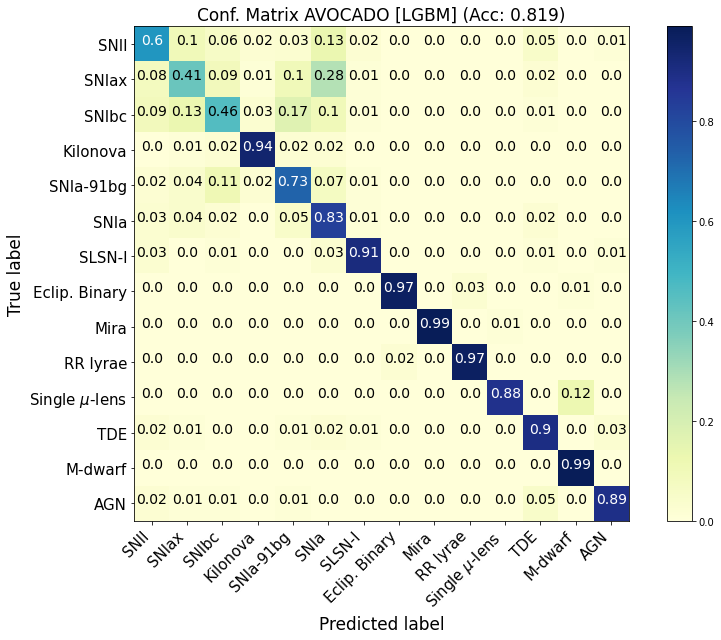

In [32]:
file = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_flat_weight.h5"
y_true, y_pred = data_lgbm(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix AVOCADO [LGBM]", out_file="notebooks/new_figures/cm_avocado_lgbm.png")

<> IBOPF-LSA <>
ADJUSTES RAND SCORE: 0.35462380732748855
ADJUSTED MUTUAL INFORMATION SCORE: 0.383333961069093
BALANCED ACCURACY: 0.650579771335526
PRECISION SCORE (micro|macro|weighted): 0.44, 0.57, 0.73
RECALL SCORE (micro|macro|weighted): 0.65, 0.57, 0.57
Normalized confusion matrix


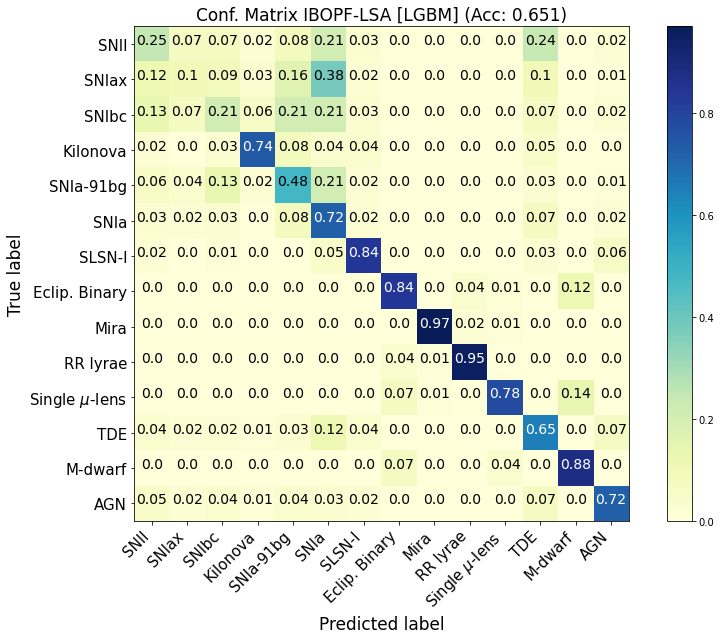

In [33]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_flat_weight_features_v3_LSA.h5"
print("<> IBOPF-LSA <>")
y_true, y_pred = data_lgbm(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-LSA [LGBM]", out_file="notebooks/new_figures/cm_ibopf_lsa_lgbm.png")

<> IBOPF-MANOVA <>
ADJUSTES RAND SCORE: 0.38207416274624856
ADJUSTED MUTUAL INFORMATION SCORE: 0.39448171418225836
BALANCED ACCURACY: 0.6451243784023062
PRECISION SCORE (micro|macro|weighted): 0.44, 0.60, 0.72
RECALL SCORE (micro|macro|weighted): 0.65, 0.60, 0.60
Normalized confusion matrix


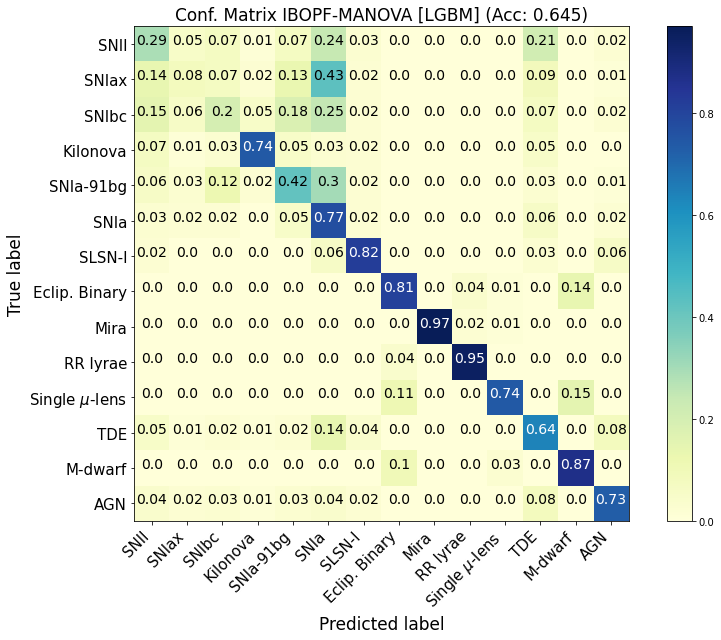

In [35]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_flat_weight_features_v3_MANOVA.h5"
print("<> IBOPF-MANOVA <>")
y_true, y_pred = data_lgbm(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-MANOVA [LGBM]", out_file="notebooks/new_figures/cm_ibopf_manova_lgbm.png")

<> IBOPF-LSA KNN <>
ADJUSTES RAND SCORE: 0.05665679679038772
ADJUSTED MUTUAL INFORMATION SCORE: 0.1531613699421573
BALANCED ACCURACY: 0.2956701532051355
Normalized confusion matrix


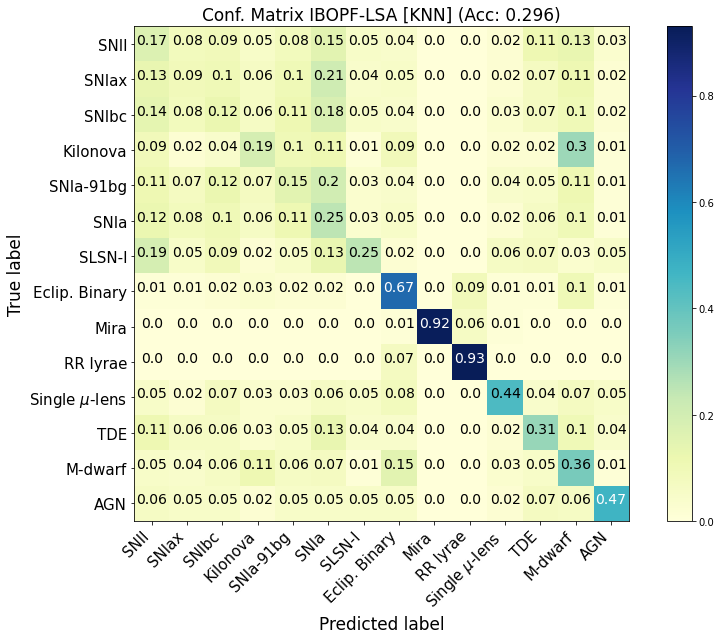

In [36]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_features_v3_LSA.h5"
print("<> IBOPF-LSA KNN <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-LSA [KNN]", out_file="notebooks/new_figures/cm_lsa_knn.png")

<> AVOCADO KNN <>
ADJUSTES RAND SCORE: 0.07652057482039389
ADJUSTED MUTUAL INFORMATION SCORE: 0.21283310798896382
BALANCED ACCURACY: 0.3448946523324483
Normalized confusion matrix


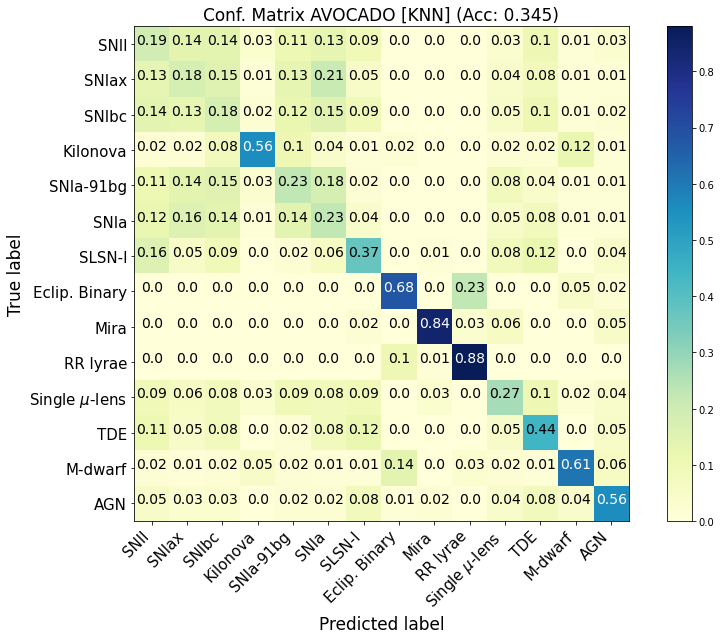

In [37]:
file = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN.h5"
print("<> AVOCADO KNN <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix AVOCADO [KNN]", out_file="notebooks/new_figures/cm_avocado_knn.png")

<> IBOPF-MANOVA KNN <>
ADJUSTES RAND SCORE: 0.06494333150808485
ADJUSTED MUTUAL INFORMATION SCORE: 0.15520536173754396
BALANCED ACCURACY: 0.28558294894591396
Normalized confusion matrix


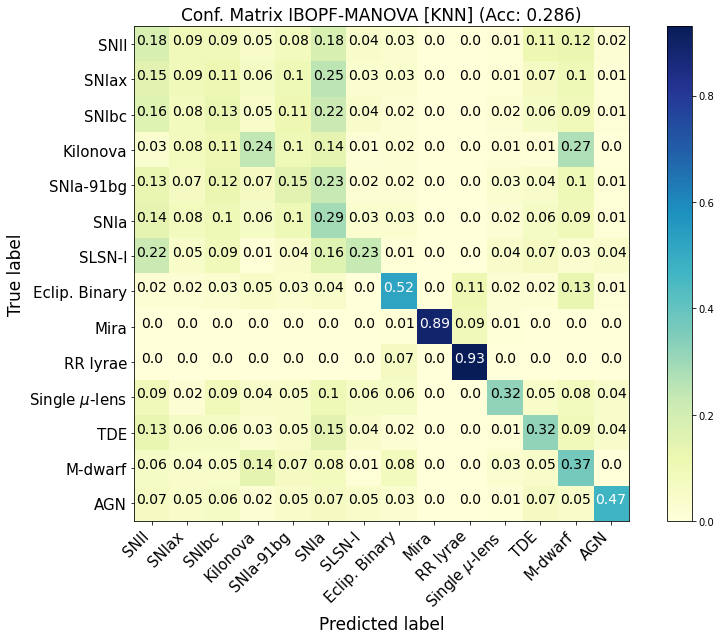

In [38]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_features_v3_MANOVA.h5"
print("<> IBOPF-MANOVA KNN <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-MANOVA [KNN]", out_file="notebooks/new_figures/cm_manova_knn.png")

<> IBOPF-LSA KNN PROTOTYPE <>
ADJUSTES RAND SCORE: 0.07165531162269062
ADJUSTED MUTUAL INFORMATION SCORE: 0.1974854961229279
BALANCED ACCURACY: 0.33351064985396456
Normalized confusion matrix


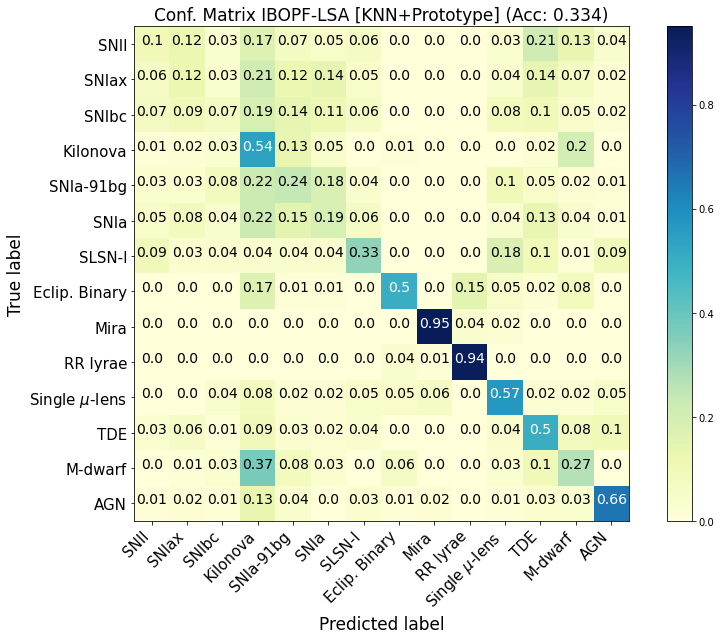

In [39]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_features_v3_LSA_prototype.h5"
print("<> IBOPF-LSA KNN PROTOTYPE <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-LSA [KNN+Prototype]", out_file="notebooks/new_figures/cm_lsa_knn_prototype.png")

<> IBOPF-MANOVA KNN PROTOTYPE <>
ADJUSTES RAND SCORE: 0.06770377493781718
ADJUSTED MUTUAL INFORMATION SCORE: 0.19121127523579673
BALANCED ACCURACY: 0.3273941146426292
Normalized confusion matrix


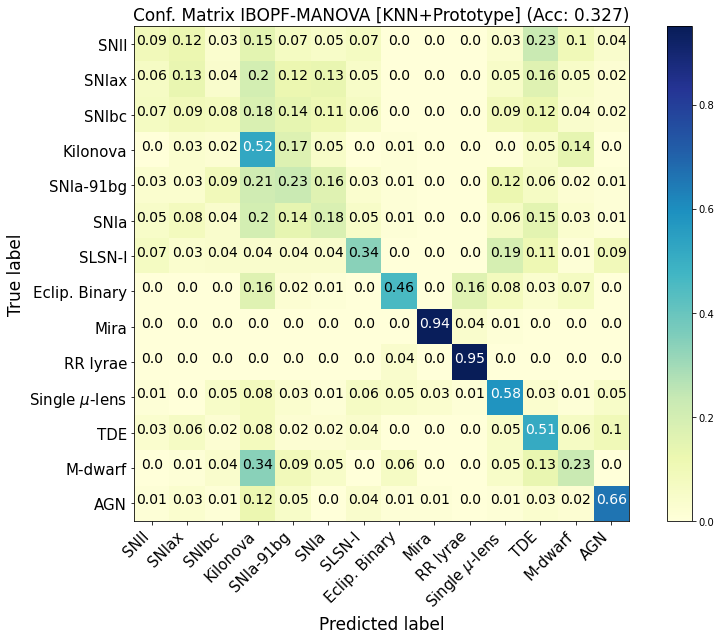

In [40]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_features_v3_MANOVA_prototype.h5"
print("<> IBOPF-MANOVA KNN PROTOTYPE <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix IBOPF-MANOVA [KNN+Prototype]", out_file="notebooks/new_figures/cm_manova_knn_prototype.png")

<> AVOCADO KNN PROTOTYPE <>
ADJUSTES RAND SCORE: 0.13795779801750038
ADJUSTED MUTUAL INFORMATION SCORE: 0.24486109300314032
BALANCED ACCURACY: 0.2679682344337657
Normalized confusion matrix


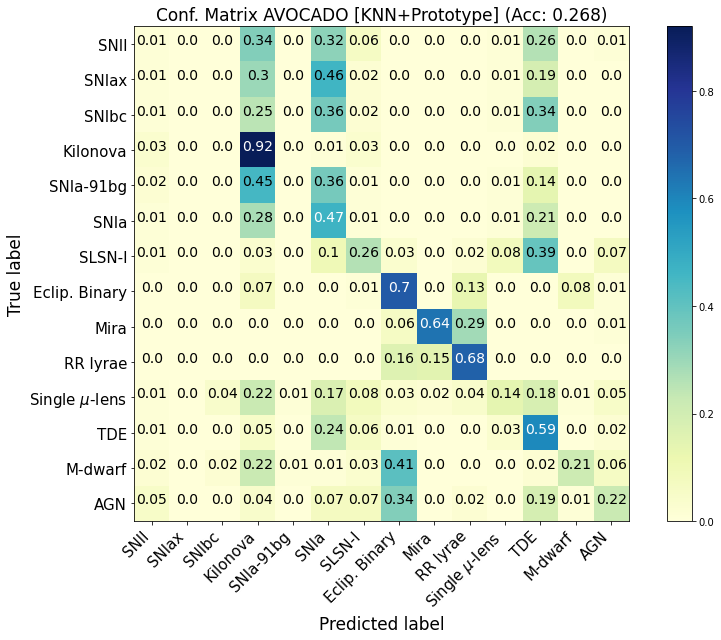

In [41]:
file = "D:/tesis/data/plasticc/AVOCADO/predictions/predictions_plasticc_test_plasticc_augment_v3_K-NN_prototype.h5"
print("<> AVOCADO KNN PROTOTYPE <>")
y_true, y_pred = data_knn(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix AVOCADO [KNN+Prototype]", out_file="notebooks/new_figures/cm_avocado_knn_prototype.png")

<> COMBINED IBOPF-MANOVA + AVOCADO <>
ADJUSTES RAND SCORE: 0.5858467391415386
ADJUSTED MUTUAL INFORMATION SCORE: 0.5598968696311493
BALANCED ACCURACY: 0.8095480257884377
PRECISION SCORE (micro|macro|weighted): 0.60, 0.77, 0.84
RECALL SCORE (micro|macro|weighted): 0.81, 0.77, 0.77
Normalized confusion matrix


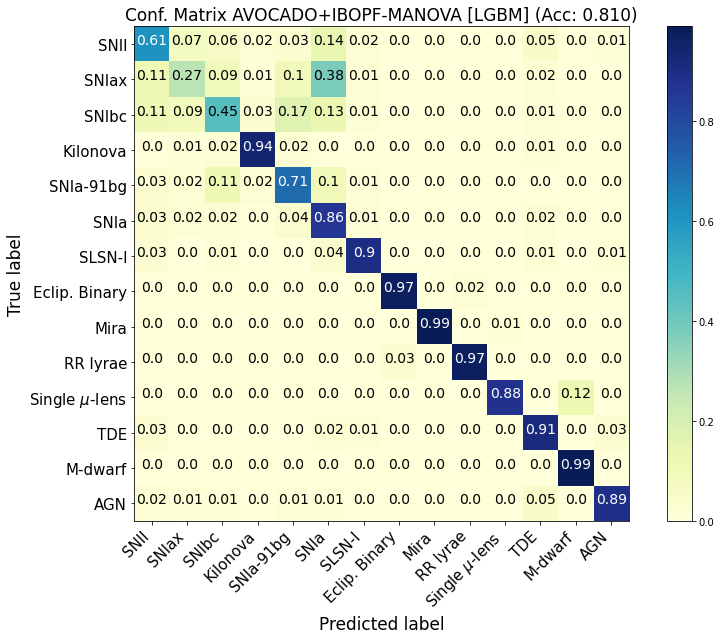

In [42]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_combined_methods_v4_features_v3_MANOVA.h5"
print("<> COMBINED IBOPF-MANOVA + AVOCADO <>")
y_true, y_pred = data_lgbm(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix AVOCADO+IBOPF-MANOVA [LGBM]", out_file="notebooks/new_figures/cm_combined_manova_lgbm.png")

<> COMBINED IBOPF-LSA + AVOCADO <>
ADJUSTES RAND SCORE: 0.5673790921488514
ADJUSTED MUTUAL INFORMATION SCORE: 0.5486635517200875
BALANCED ACCURACY: 0.8119072074933262
PRECISION SCORE (micro|macro|weighted): 0.59, 0.75, 0.84
RECALL SCORE (micro|macro|weighted): 0.81, 0.75, 0.75
Normalized confusion matrix


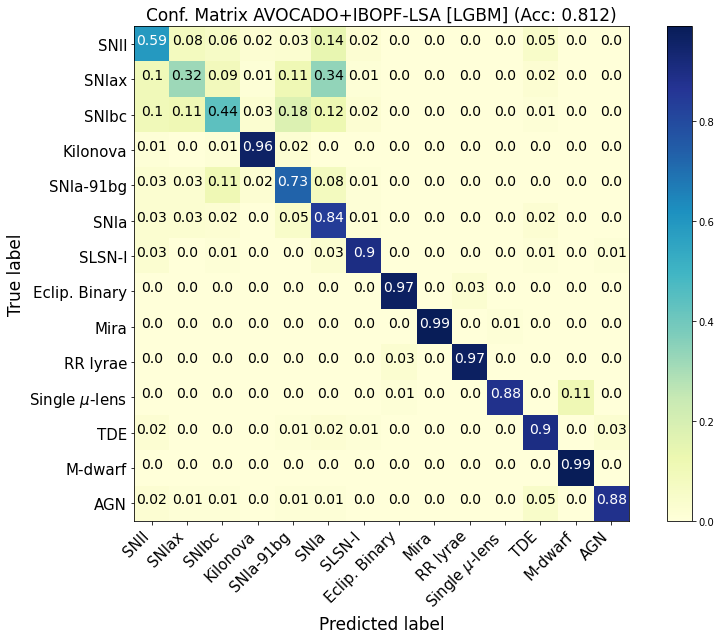

In [43]:
file = "D:/tesis/data/plasticc/IBOPF/predictions/predictions_plasticc_test_combined_methods_v4_features_v3_LSA.h5"
print("<> COMBINED IBOPF-LSA + AVOCADO <>")
y_true, y_pred = data_lgbm(file)
run_for_single_data(y_true, y_pred, title="Conf. Matrix AVOCADO+IBOPF-LSA [LGBM]", out_file="notebooks/new_figures/cm_combined_lsa_lgbm.png")

In [ ]:
import os
import sys
main_path = os.path.abspath(os.path.join(os.path.dirname("./resolution_search.ipynb"), '..'))
print(main_path)
sys.path.insert(0, main_path)
from src.preprocesing import get_mmbopf_plasticc_path, rearrange_splits, gen_dataset_from_h5
from src.mmmbopf.method import IBOPF
from src.mmmbopf.models import CompactIBOPF
from src.feature_selection.analysis_of_variance import manova_rank_fast
import numpy as np
from scipy import sparse
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import json

data_path = get_mmbopf_plasticc_path()
print(data_path)
resolution_search_main_directory = os.path.join(data_path, "resolution_search")
print(resolution_search_main_directory)
import joblib
import avocado
from statsmodels.multivariate.manova import MANOVA
plt.style.use('seaborn')
%matplotlib inline

D:\tesis
../data/plasticc/IBOPF
../data/plasticc/IBOPF\resolution_search


In [ ]:
filepath = "D:/tesis/data/plasticc/IBOPF/models/features_v3_zero_variance_model.pkl"
pipeline = joblib.load(filepath)

In [ ]:
features = avocado.read_dataframe(
    "D:/tesis/data/plasticc/IBOPF/sparse_features/features_v3_LSA_plasticc_augment_v3.h5",
    "features",
)
print(features.shape)
features2 = pipeline.transform(features)
print(features2.shape)

(80856, 816)
(80856, 768)


In [ ]:
sparse_features = sparse.csr_matrix(features.values)

In [ ]:
metadata = avocado.load("plasticc_augment_v3", metadata_only=True)
labels = metadata.metadata["class"].to_numpy()

In [6]:
%%time
method = IBOPF()
method.config_from_json("D:/tesis/data/plasticc/IBOPF/optimal_config_lsa.json")
method.print_config()

CONFIG FOR GENERAL IBOPF:
>> ALPHA:  4
>> STATISTICAL QUANTITIES:  (TrMm-MmMn-MmMx-TrMn)
>> LEVELS OF RESOLUTION:  [[110.428, 1], [406.482, 1]]
Wall time: 997 µs


In [16]:
%%time
method.C = "LSA"
model_lsa = CompactIBOPF(method="LSA")
model_lsa.set_pipeline(method, 6, 768, None)
model_lsa.pipeline.named_steps["lsa"].sc = 816
model_lsa.fit(sparse_features)
lsa_features = model_lsa.transform(sparse_features)

In [7]:
%%time
method.C = "MANOVA"
model_manova = CompactIBOPF(method="MANOVA")
model_manova.set_pipeline(method, 6, 816//6, None)
model_manova.pipeline.named_steps["manova"].k = 816//6
model_manova.fit(sparse_features, y=labels)
manova_features = model_manova.transform(sparse_features)
manova_features = manova_features.toarray()

C:\ProgramData\Miniconda3\envs\py37\lib\site-packages\numba\core\ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'parameters' of function 'feature_grouping_fast'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\src\feature_selection\analysis_of_variance.py", line 10:
@jit(nopython=True)
def feature_grouping_fast(X, n_features, n_variables, parameters):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


8/136 features failed because of absence of dependent variables
Wall time: 6.69 s


In [8]:
def k_top_mask(scores, k, parameters, n_variables):
    mask = np.zeros(scores.shape, dtype=bool)
    mask[np.argsort(scores, kind="mergesort")[-k:]] = 1
    
    bop_sizes = []
    for param in parameters:
        (win, wl, q, alpha, q_symbol, tol, mean_bp, num_reduction, threshold) = param
        bop_size = (np.array(alpha).prod() + 1) ** wl
        bop_sizes.append(bop_size)
            
    mask_extended = np.zeros(mask.shape[0] * n_variables, dtype=bool)

    k = 0
    for bsize in bop_sizes:
        for i in range(bsize):
            mask_val = mask[k + i]
            for j in range(n_variables):
                mask_extended[k * n_variables + bsize * j + i] = mask_val
        k += bsize

    return mask_extended

def cum_explained_variance_manova(X, scores, parameters, n_variables, normalize=True):
    cum_exp_var = [0]
    var_full = np.var(X, axis=0).sum()
    for k in range(1, len(scores)):
        mask = k_top_mask(scores, k, parameters, n_variables)
        reduced = X[:, mask]
        cum_exp_var_k = np.var(reduced, axis=0).sum() / var_full
        cum_exp_var.append(cum_exp_var_k)
        
    if normalize:
        cum_exp_var = (cum_exp_var - np.min(cum_exp_var))/(np.max(cum_exp_var)-np.min(cum_exp_var))
        
    return cum_exp_var
    
    

In [9]:
scores = model_manova.pipeline.named_steps["manova"].scores_


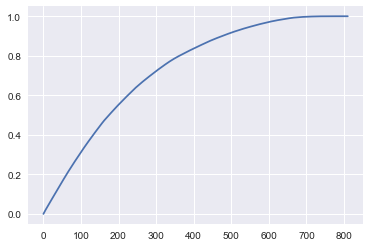

In [15]:
x0 = np.cumsum(np.sort(scores)[::-1])
x0 = (x0 - np.min(x0))/(np.max(x0) - np.min(x0))
plt.plot(np.arange(len(scores)) * 6, x0, label="MANOVA wilks lambda")

In [19]:
x1 = cum_explained_variance_manova(manova_features, scores, method.get_parameters(), 6)

In [17]:
def cum_explained_variance(full_fea, transformed_fea, normalize=True):
    explained_variances = np.var(transformed_fea, axis=0) / np.var(full_fea, axis=0).sum()
    cum_explained_variances = np.cumsum(explained_variances)
    if normalize:
        cum_explained_variances = (cum_explained_variances - np.min(cum_explained_variances)) / (np.max(cum_explained_variances) - np.min(cum_explained_variances))
    return cum_explained_variances

x2 = cum_explained_variance(manova_features, lsa_features)

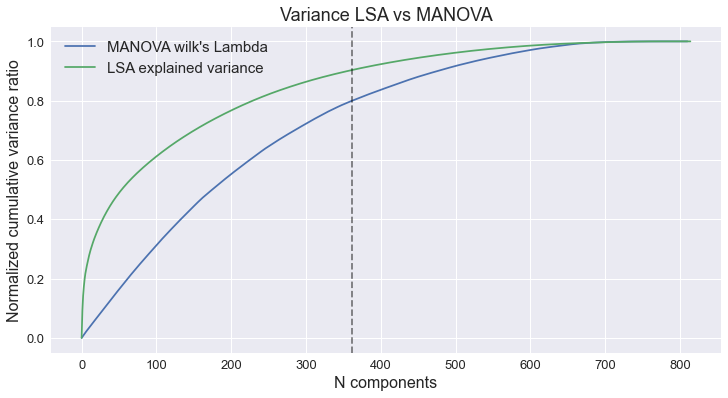

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(scores)) * 6, x0, label="MANOVA wilk's Lambda")
plt.plot(x2, label="LSA explained variance")
plt.axvline(361, color='k', linestyle="--", alpha=0.5)
# plt.plot(x3, label="LSA + DROP_ZERO_VAR")
plt.xlabel("N components", fontsize=16)
plt.ylabel("Normalized cumulative variance ratio", fontsize=16)
plt.title("Variance LSA vs MANOVA", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)
plt.savefig("figs/explained_variance.png", dpi=300)